## GDP per Capita and Life-Expectancy 1950-2018

Source: https://www.kaggle.com/datasets/luxoloshilofunde/life-expectancy-vs-gdp-19502018

### Importing libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [85]:
data = pd.read_csv('Life Expectancy vs GDP 1950-2018.csv')
data.sample(10)

,Country,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
10399,Nicaragua,1986,61.394,3011.0000,3823133.0,North America
11020,Pakistan,1977,55.796,1631.0000,70958168.0,Asia
1190,Bangladesh,2018,72.320,4099.2530,161376713.0,Asia
11485,Philippines,1952,56.130,1890.0000,19945269.0,Asia
12043,Rwanda,1950,39.535,1020.0000,2186183.0,Africa
5655,Gibraltar,2002,76.006,NaN,32097.0,Europe
13550,Somalia,1987,46.115,NaN,6862267.0,Africa
7577,Kiribati,1964,49.145,NaN,45392.0,Oceania
11132,Palau,2019,73.701,NaN,18001.0,Oceania
14678,Togo,1995,54.757,1170.5977,4226293.0,Africa


### Data Exploration & Cleaning

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16454 entries, 0 to 16453
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            16454 non-null  object 
 1   Year                               16454 non-null  int64  
 2   Life expectancy                    16450 non-null  float64
 3   GDP per capita                     10929 non-null  float64
 4   Population (historical estimates)  16450 non-null  float64
 5   Continent                          16454 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 771.4+ KB


In [87]:
data.describe().round(2)

,Year,Life expectancy,GDP per capita,Population (historical estimates)
count,16454.00,16450.00,10929.00,1.645000e+04
mean,1984.51,63.53,9833.27,2.096549e+07
std,20.21,12.13,12552.81,9.384110e+07
min,1950.00,18.91,377.58,6.450000e+02
25%,1967.00,55.56,1867.61,2.159468e+05
50%,1985.00,66.51,5054.00,3.122553e+06
75%,2002.00,72.74,12506.00,1.060448e+07
max,2019.00,86.75,156299.00,1.433784e+09


In [88]:
data.isnull().sum()

Country                                 0
Year                                    0
Life expectancy                         4
GDP per capita                       5525
Population (historical estimates)       4
Continent                               0
dtype: int64

In [89]:
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
data.isnull().sum()

Country                              0
Year                                 0
Life expectancy                      0
GDP per capita                       0
Population (historical estimates)    0
Continent                            0
dtype: int64

### Data Visualization

##### Q1: How life expectancy, GDP per Capita, and Population distributed from continent to continent around the world ?
Choose the year 2018, the most recent sample:

#### Life Expectancy Plots (2018)

Europe and South America both have high life expectancies, averaging 80 years, followed by Oceania, North America and Asia.                                                    Africa has a mean life expectancy of 60 years.

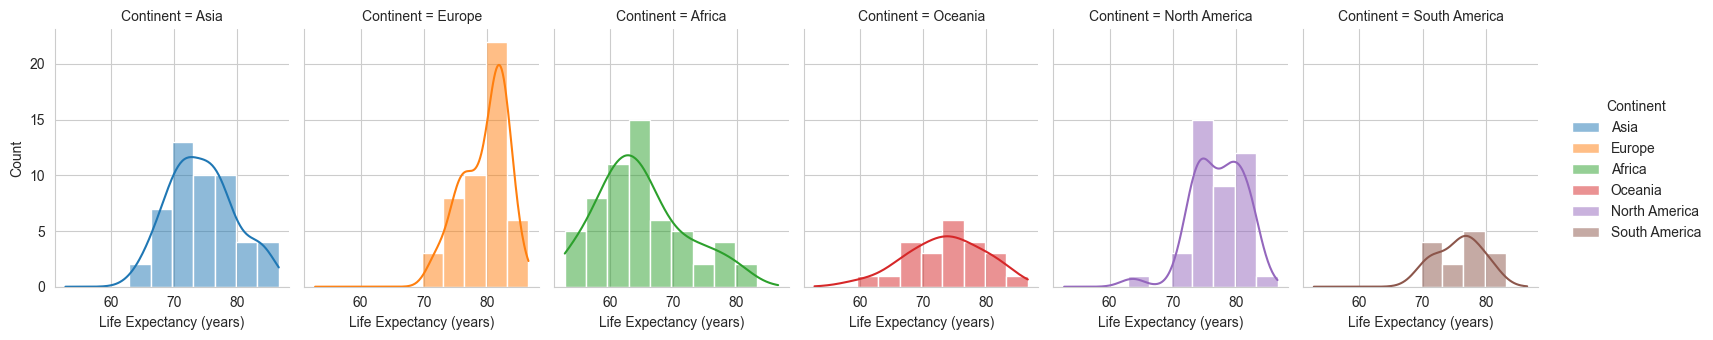

In [90]:
exp_2018 = data[data['Year'] == 2018]

plot = sns.displot(data=exp_2018, x='Life expectancy', kde=True, hue='Continent', col='Continent', height=3.5, aspect=.75)
sns.despine()
plot.set_axis_labels("Life Expectancy (years)", "Count")

plt.show()

#### GDP Per Capita Plots (2018)

Africa has a very low mean GDP per capita, while the other continents have higher ones

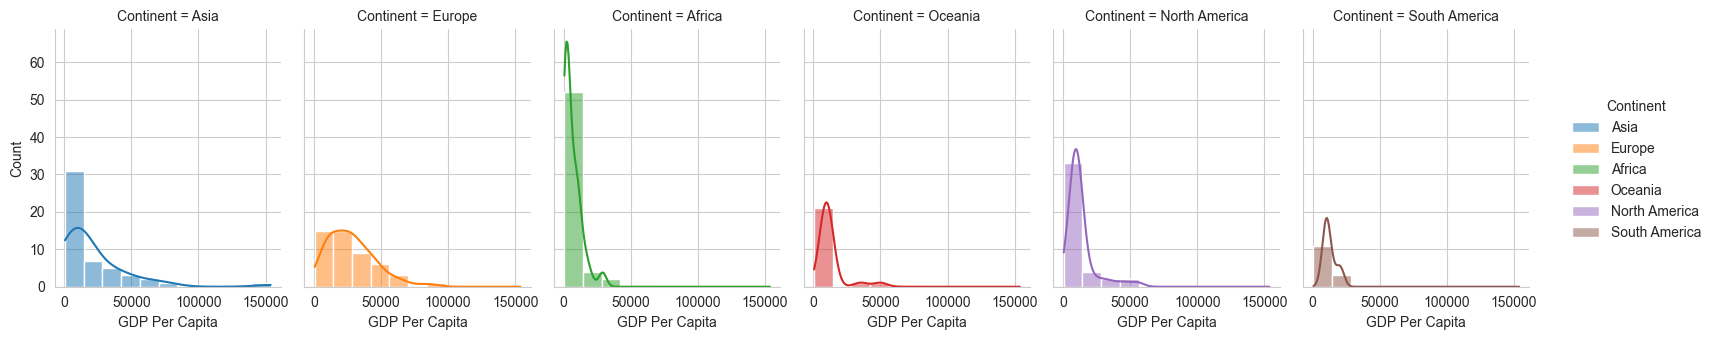

In [91]:
GDP_2018 = data[data['Year'] == 2018]

plot = sns.displot(data=GDP_2018, x='GDP per capita', kde=True, hue='Continent', col='Continent', height=3.5, aspect=.75, bins=11)
sns.despine()
plot.set_axis_labels("GDP Per Capita", "Count")

plt.show()


#### Population Plots (2018)

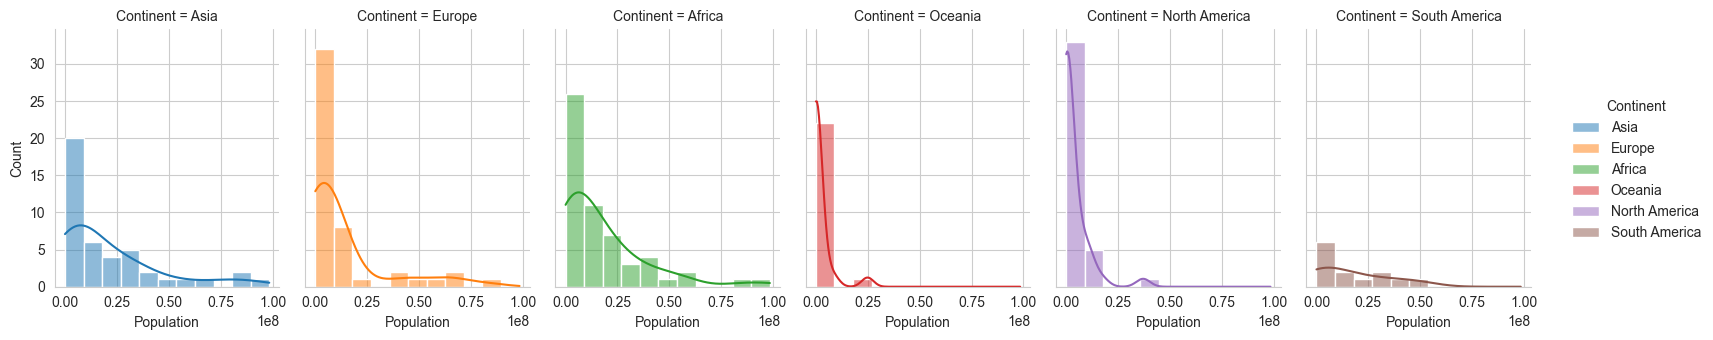

In [92]:
pop_2018 = data[(data['Year'] == 2018) & (data['Population (historical estimates)'] <= 100000000)]

plot = sns.displot(data=pop_2018, x='Population (historical estimates)', kde=True, hue='Continent', col='Continent', height=3.5, aspect=.75, bins=11)
sns.despine()
plot.set_axis_labels("Population", "Count")

plt.show()

#### The population of all countries belonging to each continent

In [99]:
pop_per_cont = data.groupby(['Continent', 'Year']).sum()['Population (historical estimates)'].unstack(level=0)
pop_per_cont

C:\Users\monta\AppData\Local\Temp\ipykernel_4040\160128763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_per_cont = data.groupby(['Continent', 'Year']).sum()['Population (historical estimates)'].unstack(level=0)


Continent,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,
1950,2.277941e+08,1.404415e+09,549822877.0,227657944.0,12975893.0,113765191.0
1951,2.323279e+08,1.435319e+09,554824889.0,231443427.0,13265718.0,116853652.0
1952,2.370966e+08,1.464327e+09,560200992.0,235651218.0,13542582.0,120043211.0
1953,2.420925e+08,1.492382e+09,565795393.0,240200327.0,13817609.0,123321741.0
1954,2.473106e+08,1.520247e+09,571490925.0,245017530.0,14099193.0,126681749.0
...,...,...,...,...,...,...
2015,1.203404e+09,4.432314e+09,807116436.5,568602481.0,39858693.0,412362689.0
2016,1.213041e+09,4.475438e+09,745438979.0,573504308.0,40435631.0,416164871.0
2017,1.244222e+09,4.517860e+09,746594441.0,578271459.0,41006479.0,419903920.0


#### Population over time

Africa, by 2018, presents an exponential growth in their population, while Europe is reaching a plateau.

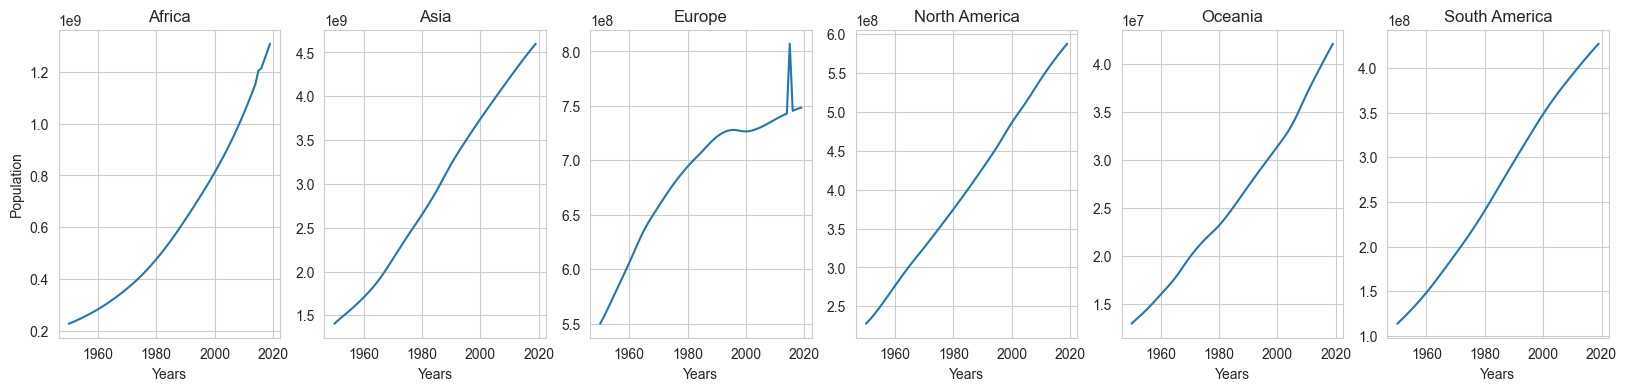

In [94]:
f, ax = plt.subplots(1, 6, figsize=(20, 4))

for i, x in enumerate(pop_per_cont.columns):
    ax[i].plot(pop_per_cont[x])
    ax[i].set_xlabel('Years')
    ax[0].set_ylabel('Population')
    ax[i].set_title(str(x))


plt.show()

#### The GDP per capita of all countries belonging to each continent

In [95]:
life_per_cont = data.groupby(['Continent', 'Year']).mean()['Life expectancy'].unstack(level=0)
life_per_cont['Difference'] = life_per_cont.std(axis=1)
life_per_cont

C:\Users\monta\AppData\Local\Temp\ipykernel_4040\1473140925.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  life_per_cont = data.groupby(['Continent', 'Year']).mean()['Life expectancy'].unstack(level=0)


Continent,Africa,Asia,Europe,North America,Oceania,South America,Difference
Year,,,,,,,
1950,38.192172,45.88894,63.175020,54.219878,51.724870,54.421286,8.491810
1951,38.427500,46.25446,63.517102,54.602317,52.059478,54.633857,8.515097
1952,38.898397,46.97270,64.184041,55.353585,52.712043,55.057214,8.558568
1953,39.369345,47.66554,64.816592,56.076976,53.330652,55.476571,8.594500
1954,39.840500,48.33270,65.414776,56.772512,53.915261,55.892071,8.622449
...,...,...,...,...,...,...,...
2015,63.522203,73.75500,78.300192,76.719976,72.927957,75.286286,5.225128
2016,63.970293,73.98584,79.383571,76.880512,73.122000,75.443643,5.300655
2017,64.369931,74.20606,79.546041,77.035317,73.307130,75.594857,5.211055


#### Life Expectency over time

C:\Users\monta\AppData\Local\Temp\ipykernel_4040\3365011648.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  life_per_cont = data.groupby(['Continent', 'Year']).mean()['Life expectancy'].unstack(level=0)


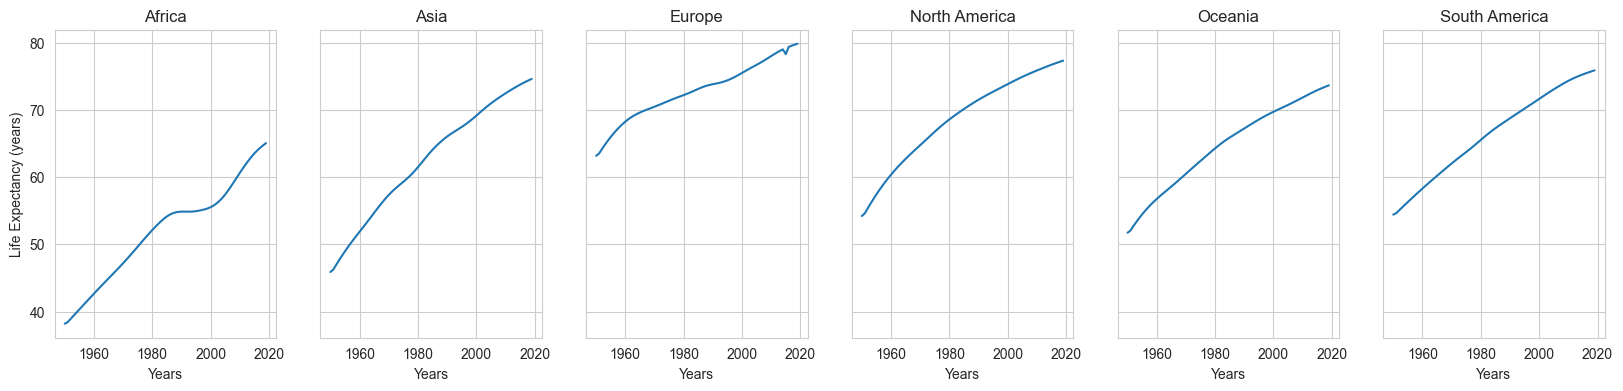

In [96]:
life_per_cont = data.groupby(['Continent', 'Year']).mean()['Life expectancy'].unstack(level=0)

f, ax = plt.subplots(1, 6, figsize=(20, 4), sharey=True)

for i, x in enumerate(life_per_cont.columns):
    ax[i].plot(life_per_cont[x])
    ax[i].set_xlabel('Years')
    ax[0].set_ylabel('Life Expectancy (years)')
    ax[i].set_title(str(x))


plt.show()

#### Plotting a scatter plot of GDP per capita vs Life Expectancy for each country

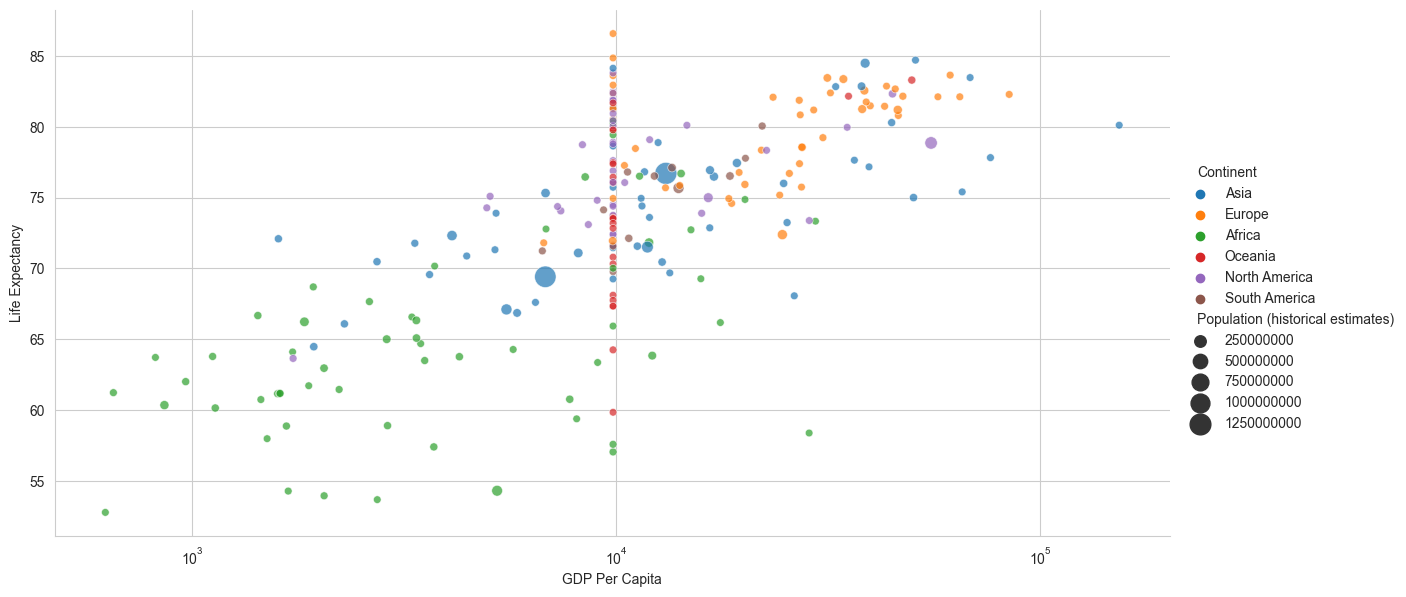

In [97]:
sns.set_style('whitegrid')

plot = sns.relplot(data=exp_2018, x='GDP per capita', y='Life expectancy', hue='Continent', size='Population (historical estimates)', alpha=0.7, edgecolors="grey", linewidth=0.5, sizes=(30, 250), height=6, aspect=2).set(xscale='log')
plot.set_axis_labels("GDP Per Capita", "Life Expectancy")

plt.show()

#### In conclusion
We can clearly see how there is a direct relationship between a country's income and life expectancy, with people in richer countries living longer lives on average.